X.shape:(400, 3)
zeta.shape:(225, 2)


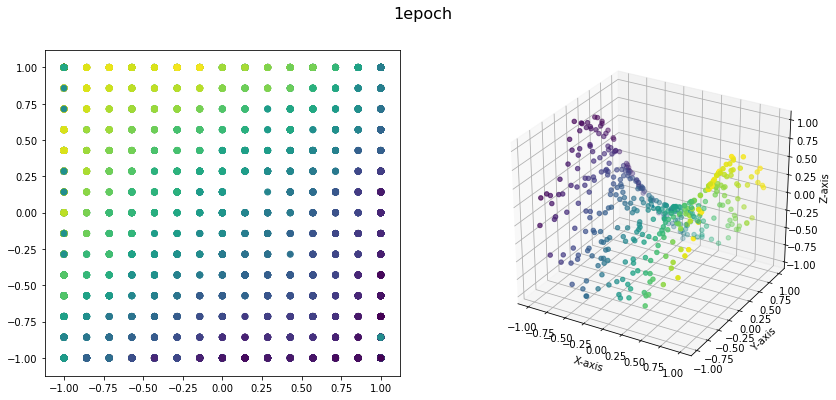

In [2]:
import sys
sys.path.append('../')
from models.SOM import SOM
from datasets.datasets import make_hyperbolic_paraboloid

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

def update(t, fig, ax1, ax2, X, zeta, k, y):
    plt.cla()
    ax1.scatter(zeta[k[t]][:,0],zeta[k[t]][:,1],c=X[:,0])
    ax2.scatter3D(X[:,0],X[:,1],X[:,2],c=X[:,0])
    Y = np.reshape(y[t], (K,K,3))
    ax2.plot_wireframe(Y[:,:,0], Y[:,:,1], Y[:,:,2])
    ax2.set_xlabel("X-axis")
    ax2.set_ylabel("Y-axis")
    ax2.set_zlabel("Z-axis")
    fig.suptitle('{}epoch'.format(t+1), fontsize=16)
    
if __name__ == '__main__':
    np.random.seed(100)
    N = 20                              # データ数(N**2)
    K = 15                              # 潜在空間のノード数(K**2)
    T = 20                              # 学習回数
    tau = 15                            # 時定数(T>tau)
    sigma_max = 2.0                     # 近傍半径の最大値
    sigma_min = 0.1                     # 近傍半径の最小値
    interval = 300                      # アニメーションの描画間隔
    
    # データ集合の作成
    X = make_hyperbolic_paraboloid(N,3,random_state=True)
    print('X.shape:{}'.format(X.shape))

    # ノード集合の作成
    zeta = np.dstack(np.meshgrid(np.linspace(-1,1,K), np.linspace(-1,1,K),indexing='ij'))
    zeta = np.reshape(zeta,(K**2,2))
    print('zeta.shape:{}'.format(zeta.shape))
    
    som = SOM(N, K, sigma_max, sigma_min, tau)
    for _ in range(T):
        som.fit(X, zeta)
    history = som.history()
    
    fig = plt.figure(figsize=(14,6))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2, projection='3d')
    fargs = [fig, ax1, ax2, X, zeta, history['k'], history['y']]
    ani = anim.FuncAnimation(fig, update, fargs=fargs, interval=interval, frames=T)
    ani.save("test.gif", writer = 'imagemagick')